In [3]:
import pandas as pd

df = pd.read_json("./data/Automotive.json", orient="records", lines=True) #állomány beolvasás
df.head(5)

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,[https://images-na.ssl-images-amazon.com/image...,4,3.0,True,"08 12, 2015",A3ELV1VUCZZGL4,0209688726,{'Color:': ' CA'},AnaG,it's fine. I just would like the stickers to b...,Serve its purpose,1439337600
1,NaN,2,NaN,True,"08 12, 2015",A2FD3FZ2WV6KHQ,0209688726,{'Color:': ' T'},Obi John Kenobi,took me three returns to get one that didn't w...,and it's still not super stable but whatever,1439337600
2,[https://images-na.ssl-images-amazon.com/image...,2,12.0,True,"08 11, 2015",A39NRKABAVSVSE,0209688726,{'Color:': ' AC'},MuddyRiverGirl,While the product is fine the description and ...,Beware! Description is wrong.,1439251200
3,NaN,5,NaN,True,"07 29, 2015",AQSBL5KODHSGW,0209688726,{'Color:': ' T'},Nate S,It's beautiful and blends right in with my woo...,"Awesome desk stand, simple and elegant",1438128000
4,NaN,5,NaN,False,"07 11, 2015",AU45OQPK2J5JF,0209688726,{'Color:': ' T'},Kort,I love this stand! I had been looking around f...,I love this stand,1436572800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           698 non-null    object 
 1   overall         50000 non-null  int64  
 2   vote            6696 non-null   float64
 3   verified        50000 non-null  bool   
 4   reviewTime      50000 non-null  object 
 5   reviewerID      50000 non-null  object 
 6   asin            50000 non-null  object 
 7   style           20175 non-null  object 
 8   reviewerName    49999 non-null  object 
 9   reviewText      49987 non-null  object 
 10  summary         49994 non-null  object 
 11  unixReviewTime  50000 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 4.2+ MB


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>, <AxesSubplot:>]],
      dtype=object)

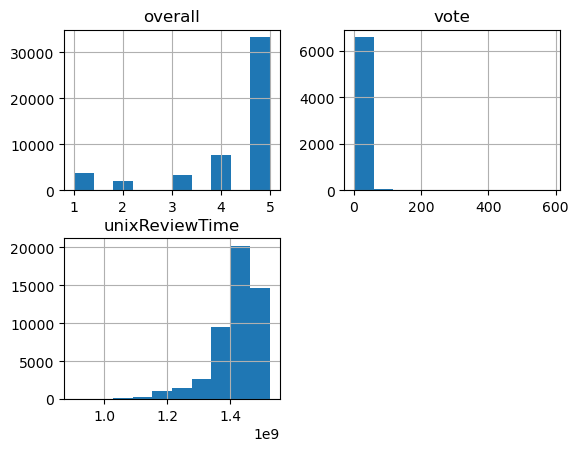

In [7]:
df.hist()

In [8]:
df_1 = df.loc[df['overall'] == 1].copy().dropna(subset="reviewText") #értékelések beolvasása, ahol a vélemény nem üres
df_2 = df.loc[df['overall'] == 2].copy().dropna(subset="reviewText")
df_5 = df.loc[df['overall'] == 5].copy().dropna(subset="reviewText")
df_5 = df_5.drop(df_5.index[range(25000)]) # túl sok pozitív értékelés kidobálása

#labelek létrehozása: 0 - negatív 1 - pozitív
df_1["label"] = 0 
df_2["label"] = 0
df_5["label"] = 1

In [9]:
len_df = len(df)
print(len_df)

len_train = int(round(len_df * 0.6))
len_val_test = (len_df - len_train) // 4
len_train = len_train // 2

print(len_train)
print(len_val_test) #train, val, test állományok nagyságának meghatározása

50000
15000
5000


In [10]:
len_df_1 = len(df_1)
len_df_2 = len(df_2)
len_df_5 = len(df_5)

len_train_1 = int(round(len_df_1 * 0.7))
len_val_test_1 = (len_df_1 - len_train_1) // 4
len_train_1 = len_train_1 // 2

len_train_2 = int(round(len_df_2 * 0.7))
len_val_test_2 = (len_df_2 - len_train_2) // 4
len_train_2 = len_train_2 // 2

len_train_5 = int(round(len_df_5 * 0.7))
len_val_test_5 = (len_df_5 - len_train_5) // 4
len_train_5 = len_train_5 // 2

#test, val, és train adatállomány létrehozása

df_1_test = df_1[:len_train_1].copy()
df_2_test = df_2[:len_train_2].copy()
df_5_test = df_5[:len_train_5].copy()

df_1_val = df_1[len_train_1:len_train_1+len_val_test_1].copy()
df_2_val = df_2[len_train_2:len_train_2+len_val_test_2].copy()
df_5_val = df_5[len_train_5:len_train_5+len_val_test_5].copy()

df_1_train = df_1[len_train_1+len_val_test_1:].copy()
df_2_train = df_2[len_train_2+len_val_test_2:].copy()
df_5_train = df_5[len_train_5+len_val_test_5:].copy()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

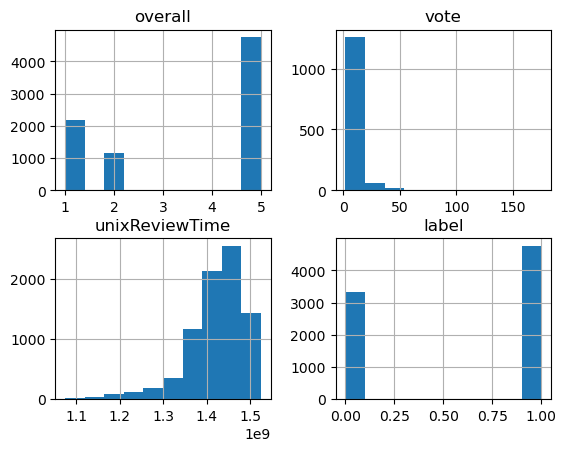

In [11]:
df_train = pd.concat([df_1_train, df_2_train, df_5_train]) # train állomány létrehozása
df_train = df_train.sample(frac=1)
df_train.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

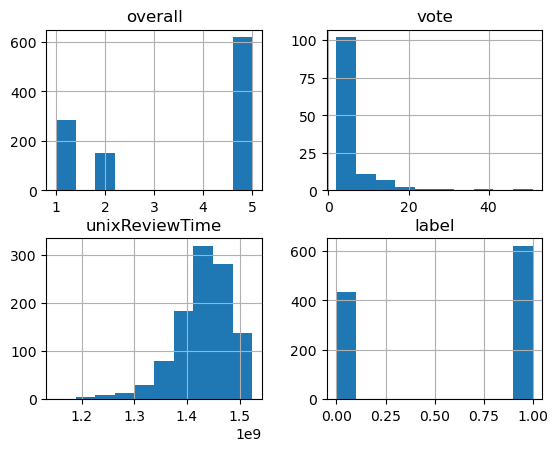

In [12]:
df_val = pd.concat([df_1_val, df_2_val, df_5_val]) # val állomány létrehozása
df_val = df_val.sample(frac=1)
df_val.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

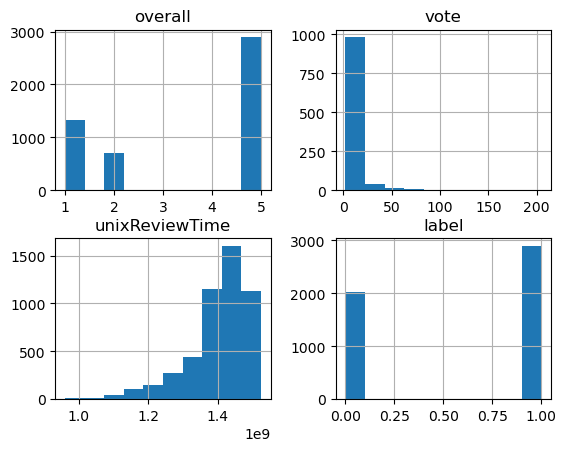

In [13]:
df_test = pd.concat([df_1_test, df_2_test, df_5_test]) # test állomány létrehozása
df_test = df_test.sample(frac=1)
df_test.hist()

In [14]:
import json

train = "./data/automotive_train.json"
df_train.to_json(train, orient="records") # train állomány mentése json fájlba


In [15]:
df_readed_train = pd.read_json(train, orient='records') #train állomány beolvasása a json fájlból
df_readed_train.head()

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,label
0,[https://images-na.ssl-images-amazon.com/image...,1,NaN,True,"02 27, 2018",A32IT5JHBSQSQJ,B0000CBILL,{'Color:': ' Red'},Julia Bolchakova,It fell apart after two weeks. Never again.,One Star,1519689600,0
1,None,2,NaN,False,"05 26, 2015",AMNAZOHGLF93P,B0000WVV6A,None,camaro,It works great if you just leave it open. Tryi...,It works great if you just leave it open,1432598400,0
2,None,1,NaN,True,"08 1, 2013",A1FRGRT2N21SWS,B0000AXDFT,"{'Size:': ' Size 1: Fits Cars 13'1"" Long'}",rp,30 days after purchase was in shreds don't was...,dont waste your money,1375315200,0
3,None,5,NaN,True,"10 7, 2014",A1ECLHUJWKNZM7,B0001CMUV4,None,BJ,Installed the tightener and it removed all the...,VERY HAPPY.,1412640000,1
4,None,1,NaN,True,"07 2, 2015",ACB7E91WOW63J,B0000AXNMO,{'Style:': ' Pack of 1'},J. Wilson,After using this product and going on a 4000 m...,Not worth buying. Did nothing on trip,1435795200,0


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

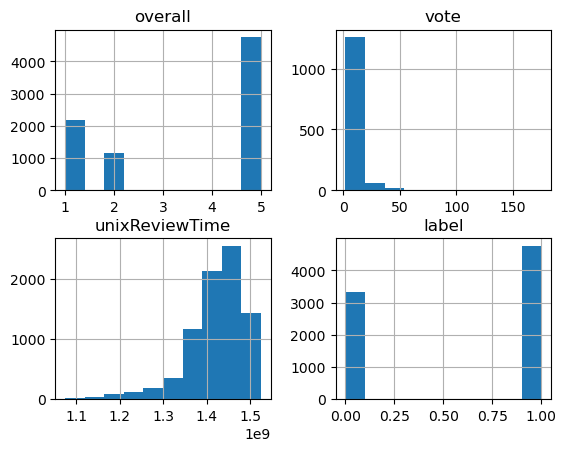

In [16]:
df_readed_train.hist()

In [17]:
val = "./data/automotive_val.json"
df_val.to_json(val, orient="records") # val állomány mentése fájlba
df_readed_val = pd.read_json(val, orient='records') # val állomány beolvasása
df_readed_val.head()

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,label
0,None,1,NaN,True,"08 15, 2015",A34PWE6GH7AMI2,B0000AXDB3,None,Hew,Did not for for me.,One Star,1439596800,0
1,None,5,NaN,True,"11 17, 2013",A1EQRPQ2081JTL,B000182EXW,None,Morton F. Nunes,Looks really nice and they work even better 1...,Love them !!!,1384646400,1
2,None,5,NaN,True,"06 23, 2015",A1U072ZNFDPF3I,B000182EW8,None,steve 4747,"AVS products are the only way to go,good price...",Another home run,1435017600,1
3,None,5,NaN,True,"03 28, 2016",A3V1QAB305FFAO,B00017YYI6,None,Brian Carty,The manual controller is a cool addition to my...,Looks cool,1459123200,1
4,None,5,3.0,True,"07 24, 2014",A3PW0782TWR552,B000182EZU,None,Starchild,Somehow this Ventshade added and completed my ...,Allows me to enjoy the ozone air during the ra...,1406160000,1


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

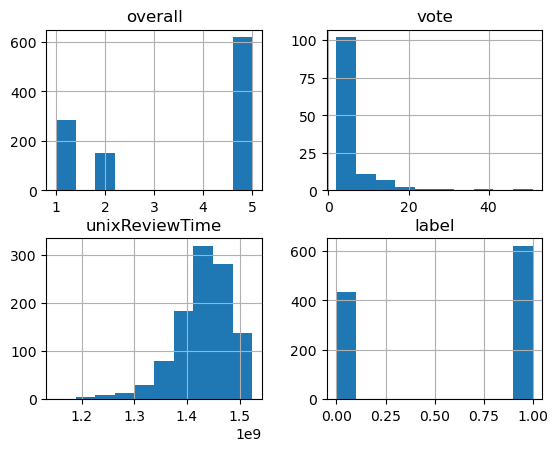

In [18]:
df_readed_val.hist()

In [19]:
test = "./data/automotive_test.json"
df_test.to_json(test, orient="records") # test állomány mentése fájlba
df_readed_test = pd.read_json(test, orient='records') # test állomány beolvasása 
df_readed_test.head()

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,label
0,None,5,NaN,True,"09 10, 2011",AVPE4VGE7MI9P,B000157TP8,None,Honest-29,I had had one of these power packs for several...,This is my second one!,1315612800,1
1,None,5,NaN,True,"08 10, 2014",A15HBTR61E21DW,B000150J5K,None,Debbie Phipps,they fit perfectly,"perfect fit, looks great!",1407628800,1
2,None,5,NaN,True,"11 11, 2014",AZ4S69W8VHMTJ,B0000WU0BC,{'Style:': ' TLK225'},Amanda J.,Well built. Everything you would ever think yo...,Excellent set.,1415664000,1
3,None,2,NaN,True,"10 18, 2014",A26BS9D9ZFWQF9,B000077CPH,{'Color:': ' Yellow'},Dipugee,The unit does not stay firmly attached to the ...,The unit does not stay firmly attached to the ...,1413590400,0
4,None,2,NaN,True,"01 12, 2014",A3KG5V0KJT2KDI,B00009WC2S,None,Brittany,"Once we got the product, we required a few mor...",Need more items for use,1389484800,0


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

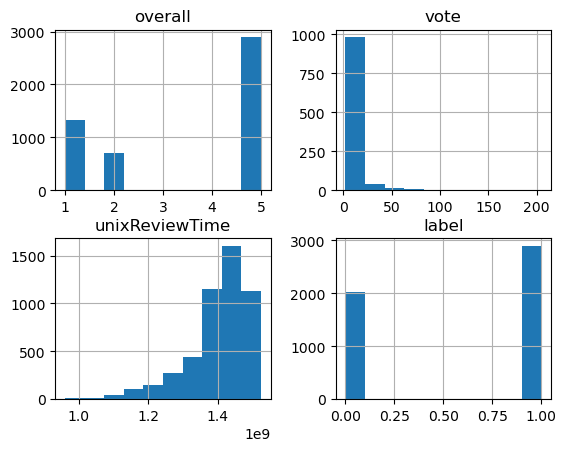

In [20]:
df_readed_test.hist()

In [21]:
def sentiment(value):
    if(value == 1):
        return "positive"
    else:
        return "negative"

df_train["sentiment"] = df_train["label"].apply(sentiment) #pozitív, negatív értékek meghatározása (egyes, kettes - negatív)
df_val["sentiment"] = df_val["label"].apply(sentiment) # ------------------------------------------ (ötös - pozitív)
df_test["sentiment"] = df_test["label"].apply(sentiment)

In [22]:
df_train[df_train["label"] == 1][:1000]

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,label,sentiment
46085,NaN,5,NaN,True,"10 7, 2014",A1ECLHUJWKNZM7,B0001CMUV4,NaN,BJ,Installed the tightener and it removed all the...,VERY HAPPY.,1412640000,1,positive
44796,NaN,5,NaN,True,"11 16, 2017",A21FQ5NR9XCURD,B0001CMUV4,NaN,David C.,"rock solid, fit perfectly",Nice,1510790400,1,positive
47090,NaN,5,NaN,True,"10 23, 2017",A23T8NW2LO9JAI,B0001EXGZG,NaN,clodhopper,WORKS LIKE IT SHOULD,Five Stars,1508716800,1,positive
44596,NaN,5,NaN,True,"11 12, 2014",A3Q7T92U7MBE8I,B0001CKHZ0,{'Size:': ' Fits 8' - 10' Trailers'},Mike Holland,Great fit for our 10ft rockwood.,Five Stars,1415750400,1,positive
47988,NaN,5,NaN,True,"06 23, 2012",A78YMB0JNAGPW,B0001EWVZC,NaN,CShooter,Installation was a little harder on my 2000 Ci...,Good product given the price is inexpensive.,1340409600,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,NaN,5,NaN,True,"12 2, 2016",A3DQU9H0AN61Q6,B0001CMUV4,NaN,robert l smith,works as expected,stowaway hitch tightner,1480636800,1,positive
47849,NaN,5,NaN,True,"01 5, 2015",A2QWTHY01AYMSV,B0001EWCQK,NaN,DIANNE BEYER,No more rain inside when you crack the window....,awesome!,1420416000,1,positive
46114,NaN,5,NaN,True,"08 23, 2014",AOARAIR00KUIA,B0001CMUV4,NaN,Cristina Barnett,best..no noise gr8.,best.. no noise gr8,1408752000,1,positive
47501,NaN,5,NaN,True,"01 28, 2014",AS7AMCKSEWA11,B0001EXBQ0,NaN,E. Spencer,The shield was installed in less than 10 minut...,Looks great!!,1390867200,1,positive


In [23]:
df_train.shape

(8077, 14)

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

STOPWORDS = stopwords.words("english")

STOPWORDS[:10] #stopword-ök meghatározása

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kovac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
nltk.download('punkt')

tokenized_reviews = df_train["reviewText"].apply(lambda review_text: word_tokenize(review_text.lower()))

tokenized_reviews.head() #tokenizálás

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kovac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


32767    [it, fell, apart, after, two, weeks, ., never,...
39382    [it, works, great, if, you, just, leave, it, o...
16319    [30, days, after, purchase, was, in, shreds, d...
46085    [installed, the, tightener, and, it, removed, ...
16376    [after, using, this, product, and, going, on, ...
Name: reviewText, dtype: object

In [27]:
d = dict()

for review in tokenized_reviews:
    for word in review:
        if word not in STOPWORDS and word.isalpha():
            d[word] = d.get(word, 0) + 1
#szótár meghatározása, stopword-ök ignorálása

In [28]:
DESIRED_VOCAB_SIZE = 4000


VOCAB = [k for k,v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:DESIRED_VOCAB_SIZE]] #szótár elkészítése

In [29]:
word_table = pd.DataFrame({"word": VOCAB})
word_table.to_json("./data/vocab.json", orient="records") #dataframe készítése a szótárból

In [30]:
word_table = pd.read_json("./data/vocab.json", orient="records")
word_table.info()
word_table.head(10) #word table mentése fájlba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    4000 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


,word
0,great
1,product
2,one
3,would
4,car
5,fit
6,good
7,easy
8,use
9,works


In [31]:
dict_freqs = {"positive": {}, "negative": {}}

In [32]:
VOCAB_IDX = {}
for i in range(0, len(word_table["word"].values)):
    VOCAB_IDX[word_table["word"].values[i]] = i

for idx in range(df_train.shape[0]):
    review = df_train.iloc[idx]["reviewText"]
    sentiment = df_train.iloc[idx]["sentiment"]
    
    for word in review.split(" "):
        if word in VOCAB_IDX:
            dict_freqs[sentiment][word] = dict_freqs[sentiment].get(word, 0) + 1 
            # előfordulások számolása negatív és pozitív környezetben

In [33]:
dict_freqs["positive"]["good"]

384

In [34]:
dict_freqs["negative"]["good"]

335

In [35]:
word_table.head()

,word
0,great
1,product
2,one
3,would
4,car


In [36]:
total_positive = sum(dict_freqs["positive"].values())

word_table["positive"] = [(dict_freqs["positive"].get(w, 0) + 1) / (total_positive + len(VOCAB))  for w in word_table["word"]]
#szavak előfordulásának aránya meghatározása az összes pozitív előfordulásból

In [37]:
total_negative = sum(dict_freqs["negative"].values())

word_table["negative"] = [(dict_freqs["negative"].get(w, 0) + 1) / (total_negative + len(VOCAB))  for w in word_table["word"]]
#szavak előfordulásának aránya meghatározása az összes negatív előfordulásból

In [38]:
word_table.head()

,word,positive,negative
0,great,0.013754,0.002310
1,product,0.008153,0.009560
2,one,0.009408,0.010200
3,would,0.007036,0.011785
4,car,0.008173,0.006845


In [39]:
import numpy as np

word_table["ratio"] = np.log(word_table["positive"] / word_table["negative"])
#szavak előfordulásának meghatározása pozitív:negatív arányban

In [40]:
word_table.head()

,word,positive,negative,ratio
0,great,0.013754,0.002310,1.784128
1,product,0.008153,0.009560,-0.159227
2,one,0.009408,0.010200,-0.080832
3,would,0.007036,0.011785,-0.515765
4,car,0.008173,0.006845,0.177221


In [41]:
word_table = word_table.set_index("word")

In [42]:
word_table.head()

,positive,negative,ratio
word,,,
great,0.013754,0.002310,1.784128
product,0.008153,0.009560,-0.159227
one,0.009408,0.010200,-0.080832
would,0.007036,0.011785,-0.515765
car,0.008173,0.006845,0.177221


In [43]:
word_table["ratio"].describe()

count    4000.000000
mean       -0.137895
std         1.033686
min        -4.457555
25%        -0.921517
50%        -0.148965
75%         0.572883
max         3.534713
Name: ratio, dtype: float64

In [44]:
word_table["word"] = word_table.index
word_table.head()

,positive,negative,ratio,word
word,,,,
great,0.013754,0.002310,1.784128,great
product,0.008153,0.009560,-0.159227,product
one,0.009408,0.010200,-0.080832,one
would,0.007036,0.011785,-0.515765,would
car,0.008173,0.006845,0.177221,car


In [45]:
word_table.to_json("./data/word_table.json",orient="records") # word table mentés efájlba

In [46]:
import pandas as pd

word_table = pd.read_json("./data/word_table.json", orient="records")
word_table.head() #word table beolvasása

,positive,negative,ratio,word
0,0.013754,0.002310,1.784128,great
1,0.008153,0.009560,-0.159227,product
2,0.009408,0.010200,-0.080832,one
3,0.007036,0.011785,-0.515765,would
4,0.008173,0.006845,0.177221,car


In [47]:
word_table = word_table.set_index("word")
word_table.head()

,positive,negative,ratio
word,,,
great,0.013754,0.002310,1.784128
product,0.008153,0.009560,-0.159227
one,0.009408,0.010200,-0.080832
would,0.007036,0.011785,-0.515765
car,0.008173,0.006845,0.177221


In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

STOPWORDS = stopwords.words("english")

def predict_for_review_raw(review):

    word_table_words = word_table.index

    return sum([word_table["ratio"].loc[token] for token in review if token in word_table_words])
#milyen arányban fordul elő a szó pozitív értékelésekben?

In [57]:
predict_for_review_raw("This part was bad for me!") #ha az érték negatív akkor negatív értékelésben 
#  -------------------------------------------------szerepel inkább, egyébként pozitív

-0.4995729186000001

In [50]:
def predict_for_review(review):
    return int(predict_for_review_raw(review) > 0)
#ha kisebb mint 0 akkor negatív, ha nagyobb akkor pozitív 

In [51]:
preds = df_train["reviewText"].apply(predict_for_review)

preds # prediktálás

32767    0
39382    0
16319    0
46085    0
16376    1
        ..
43816    0
48577    0
38495    0
43963    0
47063    0
Name: reviewText, Length: 8077, dtype: int64

In [52]:
real = (df_train["sentiment"] == "positive").astype(int)

In [53]:
def get_accuracy(preds, real):
    return sum(preds == real) / len(real)

In [54]:
print(f"Training set accuracy: {get_accuracy(preds, real)}") #training

Training set accuracy: 0.4255292806735174


In [55]:
preds_val = df_val["reviewText"].apply(predict_for_review)
real_val = (df_val["sentiment"] == "positive").astype(int)
print(f"Validation set accuracy: {get_accuracy(preds_val, real_val)}") # validáció

Validation set accuracy: 0.4311490978157645


In [56]:
preds_test = df_test["reviewText"].apply(predict_for_review)
real_test = (df_test["sentiment"] == "positive").astype(int)
print(f"Test set accuracy: {get_accuracy(preds_test, real_test)}")#teszt

Test set accuracy: 0.43886063072227877
